In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import linear_model
import matplotlib.pyplot as ply
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
airline_data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Datascience-Batch-22/main/32.%20Time-as%20a%20Condition-Time%20Series%20and%20Video%20Frame%20Prediction/airline-passengers.csv",index_col = "Month", parse_dates = True)

In [3]:
airline_data.isna().sum()

Passengers    0
dtype: int64

In [4]:
airline_data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
result = seasonal_decompose(airline_data['Passengers'], model = 'multiplicative')

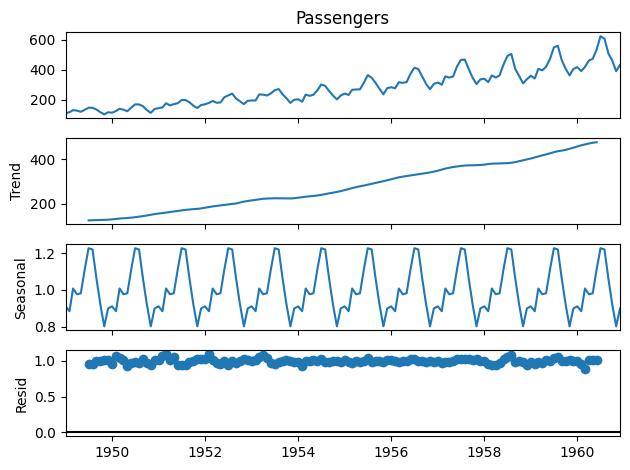

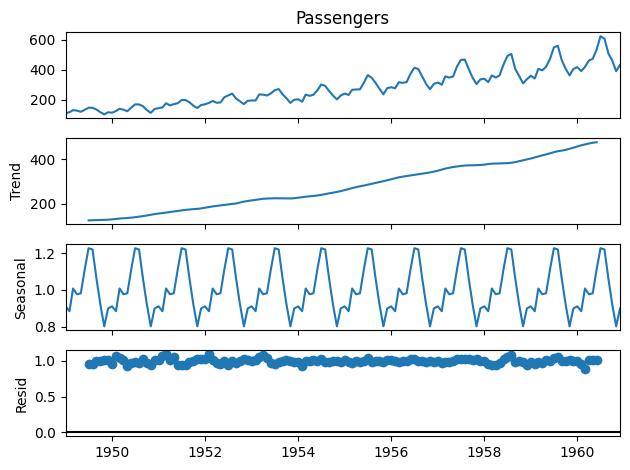

In [6]:
result.plot()

In [7]:
airline_data['3-month-SMA'] = airline_data['Passengers'].rolling(window = 3).mean()

<Axes: xlabel='Month'>

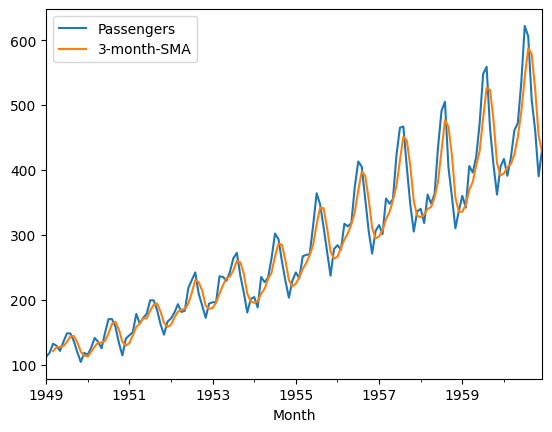

In [8]:
airline_data.plot()

In [9]:
airline_data['6-month-SMA'] = airline_data['Passengers'].rolling(window = 6).mean()

<Axes: xlabel='Month'>

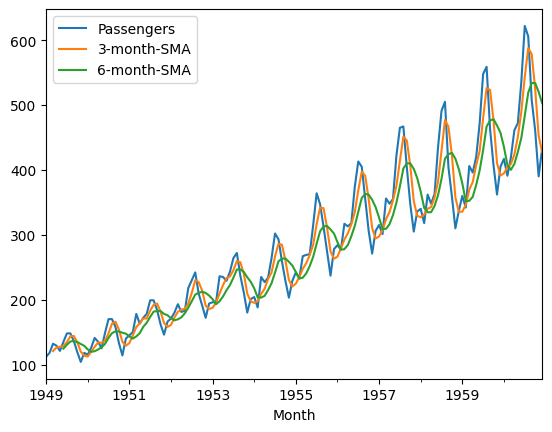

In [10]:
airline_data.plot()

<Axes: xlabel='Month'>

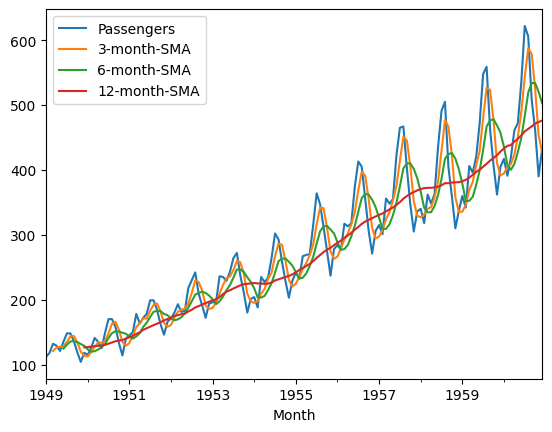

In [11]:
airline_data['12-month-SMA'] = airline_data['Passengers'].rolling(window = 12).mean()
airline_data.plot()

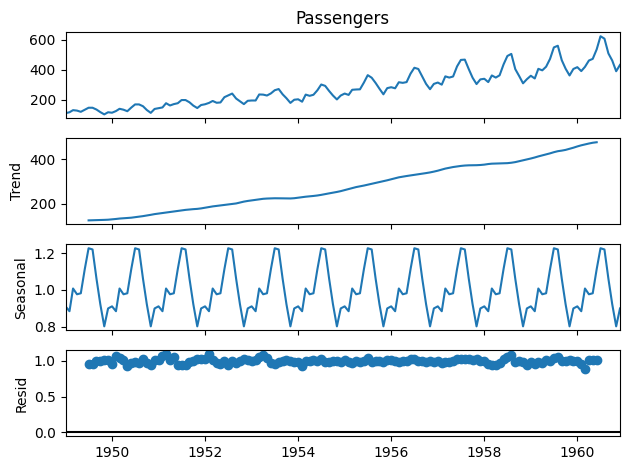

In [13]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

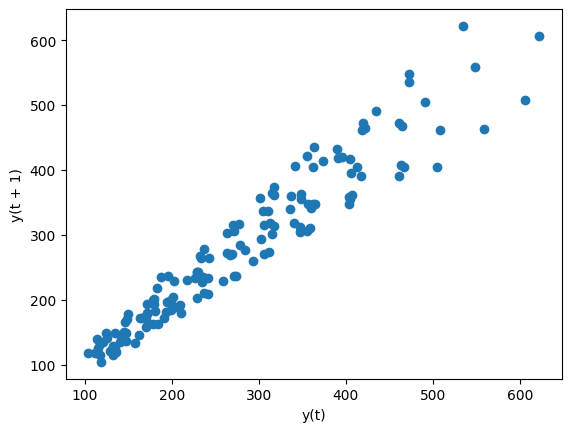

In [15]:
lag_plot(airline_data['Passengers'])

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

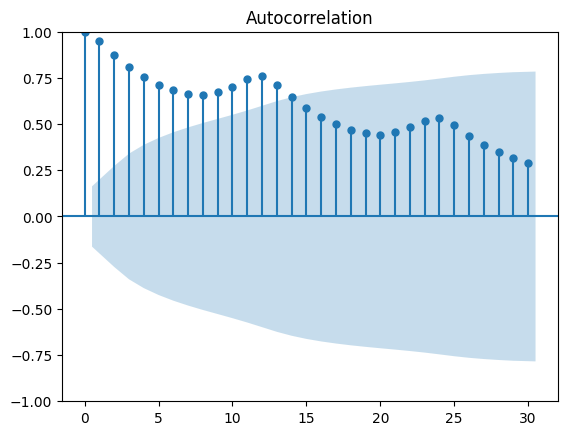

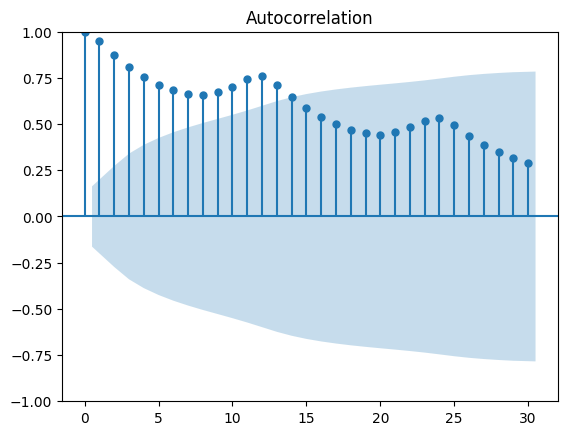

In [17]:
plot_acf(airline_data['Passengers'],lags = 30)

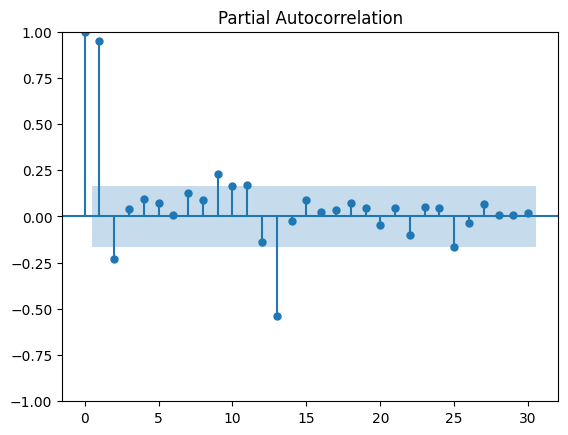

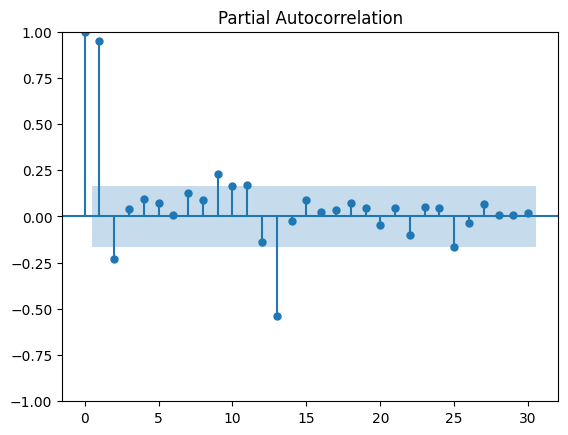

In [18]:
plot_pacf(airline_data['Passengers'],lags = 30)

In [ ]:
TS = Trend * SI * Res
TS = Trend + SI + Res

## DECOMPOSITION MODEL

In [19]:
airline_data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Datascience-Batch-22/main/32.%20Time-as%20a%20Condition-Time%20Series%20and%20Video%20Frame%20Prediction/airline-passengers.csv")

In [20]:
airline_data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
airline_data['Month'] = pd.to_datetime(airline_data['Month'])

In [22]:
airline_data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [23]:
airline_data['Year'] = airline_data['Month'].dt.year
airline_data['month'] = airline_data['Month'].dt.month
#Add Quarter if necessary

In [25]:
airline_data['Year'].value_counts()

Year
1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: count, dtype: int64

In [26]:
Train = airline_data[(airline_data.Year < 1960)]
Test = airline_data[(airline_data.Year >= 1960)]

In [28]:
Train.head()

,Month,Passengers,Year,month
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5


In [48]:
#Train['S.I'] = Train['Passengers'].apply(lambda x: ((x*12)/Train['Passengers'].sum()))

In [34]:
Train = Train.sort_values(['Month'])
Train.index = range(len(Train))
Train['ID'] = range(1,len(Train)+1)

In [37]:
lm = linear_model.LinearRegression()
X = np.array(Train[['ID']])
Y = np.array(Train['Passengers']).reshape(-1,1)

In [38]:
model = lm.fit(X,Y)

In [50]:
#Train = Train.sort_values(['Month'])
Train['Trend'] = model.predict(np.array(Train[['ID']]))

In [53]:
Train.head()

,Month,Passengers,Year,month,S.I,ID,Trend
0,1949-01-01,112,1949,1,1.184319,1,94.569150
1,1949-02-01,118,1949,2,1.214831,2,97.132864
2,1949-03-01,132,1949,3,1.324017,3,99.696578
3,1949-04-01,129,1949,4,1.261487,4,102.260292
4,1949-05-01,121,1949,5,1.154316,5,104.824007


In [39]:
Test['ID'] = range(len(Test))
Test['ID'] = Test['ID'] + max(Train['ID'])
X_test = np.array(Test[['ID']])
y_test = model.predict(X_test)

<ipython-input-39-cbe8470eb568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['ID'] = range(len(Test))
<ipython-input-39-cbe8470eb568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['ID'] = Test['ID'] + max(Train['ID'])


In [40]:
Test['trend'] = y_test

<ipython-input-40-9b4dababd34d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['trend'] = y_test


In [41]:
Test.head()

,Month,Passengers,Year,month,ID,trend
132,1960-01-01,417,1960,1,132,430.415698
133,1960-02-01,391,1960,2,133,432.979412
134,1960-03-01,419,1960,3,134,435.543127
135,1960-04-01,461,1960,4,135,438.106841
136,1960-05-01,472,1960,5,136,440.670555


In [43]:
Train.head(20)

,Month,Passengers,Year,month,S.I,ID
0,1949-01-01,112,1949,1,0.038789,1
1,1949-02-01,118,1949,2,0.040867,2
2,1949-03-01,132,1949,3,0.045716,3
3,1949-04-01,129,1949,4,0.044677,4
4,1949-05-01,121,1949,5,0.041906,5
5,1949-06-01,135,1949,6,0.046755,6
6,1949-07-01,148,1949,7,0.051257,7
7,1949-08-01,148,1949,8,0.051257,8
8,1949-09-01,136,1949,9,0.047101,9
9,1949-10-01,119,1949,10,0.041213,10


In [54]:
Test['Prediction'] = y_test*np.array(Train.iloc[0:len(y_test)]['S.I']).reshape(-1,1)

<ipython-input-54-0e0c824bda0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Prediction'] = y_test*np.array(Train.iloc[0:len(y_test)]['S.I']).reshape(-1,1)


In [55]:
import matplotlib.pyplot as plt

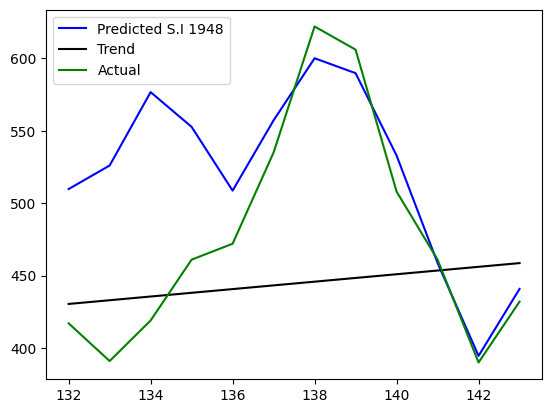

In [58]:
plt.plot(Test['Prediction'], color = 'blue',label = 'Predicted S.I 1948')
plt.plot(Test['trend'], color = 'black',label = 'Trend')
plt.plot(Test['Passengers'], color = 'green',label = 'Actual')
plt.legend()
plt.show()